# Python intermediate


Vítej ve cvičebním notebooku modulu Python intermediate! Postupně tě interaktivně provede probíranými tématy a poodkryje další zákoutí jazyka Python :) 

In [10]:
# imports
import random
from contextlib import contextmanager
import traceback

# Vsuvka: Správce kontextu jako funkce
V rámci tohoto cvičení se vrátíme ještě na chvíli ke **správcům kontextu**. Minule jsme si ukázali, jak zadefinovat a použít správce kontextu jako třídu. Nyní si ukážeme, že správce kontextu může být i funkce.

Zde se nám látka prováže s generátory - bude se nám totiž hodit klíčové slovo `yield` :)

### Ukázka 1
Pro ukázku zvolíme nám již dobře známý příklad klasického otevírání souboru. 

#### Třída
```python
class SpravceSouboru():
    def __init__(self, nazev_souboru, mod):
        self.nazev_souboru = nazev_souboru
        self.mod = mod
        self.soubor = None

    def __enter__(self):
        # Zpřístupnění a sdílení zdrojů
        self.soubor = open(self.nazev_souboru, self.mod)
        return self.soubor

    def __exit__(self, typ, hodnota, trasovani_chyby):
        # Čištění a uvolňování zdrojů
        self.soubor.close()

# použití
with SpravceSouboru("test.txt", 'w') as soubor_zapis:
    soubor_zapis.write("Test")
```

#### Funkce
.. k němu ekvivalentní zápis pomocí **funkce** by vypadal takto:

```python
@contextmanager
def spravce_souboru(nazev_souboru, mod):
    soubor = open(nazev_souboru, mod)
    yield soubor
    soubor.close()

# použití
with spravce_souboru("test.txt", 'w') as soubor_zapis:
    soubor_zapis.write("Test")
```

To je docela hezké a jednoduché, ne? Pojďme se v tom spolu trochu povrtat. Kde by se to mohlo rozbít? (Můžeme?)

### Ukázka 2: Robustní vůči problému ve `with` bloku

#### Třída
Co když dojde k erroru ve `with` bloku? Jak bychom měli upravit třídu `SpravceSouboru`, abychom chybu zachytili? A jak je to s prováděním funkce `__exit__`?

```python
# dopln po demu
```
#### Funkce
Zkusme si to samé s funkcí. Jak bychom měli upravit funkci `spravce_souboru`, aby byla robustní vůči chybě v `with` bloku? (*Hint*: obalení `yield`u do `try` bloku a přidání `finally`. `except` blok může nebo nemusí zachytit chybu)

```python
# dopln po demu
```

### Ukázka 3: Robustní vůči problému v `__enter__` metodě
Co by se stalo, kdyby došlo k chybě v `__enter__` metodě? Jak bychom měli upravit třídu `SpravceSouboru`, aby se provedl správně `__exit__`, případně aby chybu zachytila?

### Třída
```python
# dopln po demu
```

### Funkce
```python
# dopln po demu
```

## Co jsem tím chtěl říct?
1. Správce kontextu může být i **funkce** (a její zápis může být jednodušší než u třídy)
2. Napříč koncepty je nutné skutečně pochopit v jakém pořadí se věci dějí a jaké jsou možné chyby, které se mohou vyskytnout.
3. I věci, které vypadají složitě, mohou být ještě složitější :) 

In [6]:
from contextlib import contextmanager

@contextmanager
def spravce_souboru(nazev_souboru, mod):
    soubor = open(nazev_souboru, mod)
    yield soubor
    soubor.close()

# použití
with spravce_souboru("test.txt", 'w') as soubor_zapis:
    soubor_zapis.write("Test")

## Multithreading vs. multiprocessing


- **Program** je spustitelný soubor, který se skládá ze sady instrukcí k provedení určitého úkolu a je obvykle uložen na disku vašeho počítače.

- **Proces** je to, co nazýváme program, který byl načten do paměti spolu se všemi prostředky, které potřebuje k provozu. Má svůj vlastní paměťový prostor.
- **Vlákno** je jednotkou provedení v rámci procesu. Proces může mít několik vláken spuštěných jako jeho součást, kde každé vlákno používá paměťový prostor procesu a sdílí ho s ostatními vlákny.
- **Multithreading** je technika, kde proces spouští několik vláken k provedení různých úkolů současně. Dává nám to iluzi, že vlákna běží paralelně, ale ve skutečnosti se v běhu střídají. V jazyce Python brání paralelnímu běhu vláken Globální uzávěrka interpretu (GIL).
- **Multiprocessing** je technika, kde je dosaženo paralelismu v jeho nejčistší formě. Více procesů běží na více jádrech CPU, která si mezi sebou nesdílí prostředky. Každý proces může mít mnoho vláken běžících ve svém vlastním paměťovém prostoru. V jazyce Python má každý proces svou vlastní instanci Pythoního interpretu, který vykonává úkoly.

## Konkurence v čase
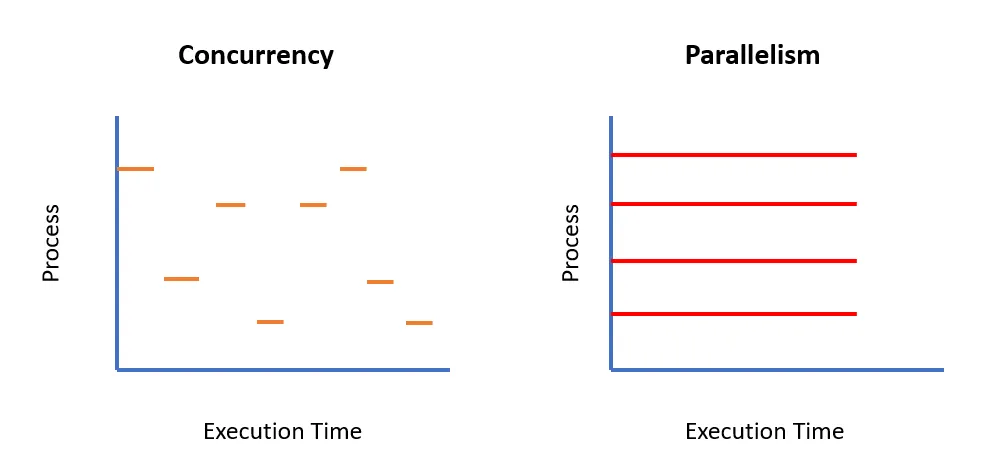

## Konkurence o zdroje
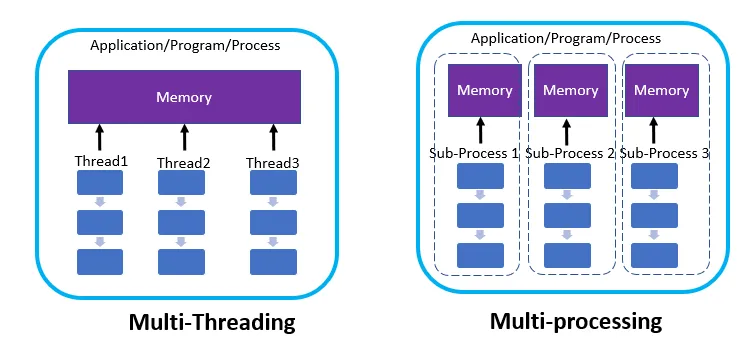


### Analogie:
Představte si program jako kuchyni. Kuchaři jsou vlákna a vybavení kuchyně jsou jako zdroje (paměť, čas procesoru).

#### Multithreading:
Více kuchařů (vláken) pracujících společně ve stejné kuchyni (procesu).
Sdílí spotřebiče (paměť, ALU) a mohou snadno komunikovat.
Ale musí spolupracovat, aby se vyhnuli konfliktům (např. dva kuchaři nemohou najednou používat plotýnku, ale pokud jeden čeká, až se mu upeče kachna, druhý může vařit polévku).

#### Multiprocessing:
Více kuchyní (procesů), každá s vlastní sadou kuchařů (vláken) a spotřebičů (paměť, procesor).
Kuchaři v jedné kuchyni nespolupracují přímo s kuchaři v jiné kuchyni, ale mohou používat speciální systémy (IPC), aby sdíleli informace.

----------------


### Multithreading
Multithreading je technika, kde proces spouští několik vláken k provedení různých úkolů současně. Dává nám to iluzi, že vlákna běží paralelně, ale ve skutečnosti se v běhu střídají. V jazyce Python brání paralelnímu běhu vláken Globální uzávěrka interpretu (GIL).

Typicky je vhodný pro urychlení **I/O operací** (čtení a zápis do souborů, síťové operace, ...). To proto, že I/O operace ke svému běhu **nepotřebují práci procesoru**. Proto v okamžiku, kdy vlákno čeká na odpověď z I/O operace, může běžet jiné vlákno.

Pro práci s vlákny budeme používat modul `threading`. Důležité akce jsou:

```python
import threading


thread = threading.Thread(target=function, args=[arg1, arg2]) # vytvoření vlákna

thread.start() # spuštění vlákna

thread.join() # čekání na ukončení vlákna

```





#### Společný kód pro cvičení 1 - ...

In [1]:
import time, os
from threading import Thread, current_thread
from multiprocessing import Process, current_process


COUNT = 100000000
SLEEP = 3

def io_bound(sec):

	pid = os.getpid()
	threadName = current_thread().name
	processName = current_process().name

	print(f"{pid} * {processName} * {threadName} \
		---> Start sleeping...")
	time.sleep(sec)
	print(f"{pid} * {processName} * {threadName} \
		---> Finished sleeping...")

def cpu_bound(n):

	pid = os.getpid()
	threadName = current_thread().name
	processName = current_process().name

	print(f"{pid} * {processName} * {threadName} \
		---> Start counting...")

	while n>0:
		n -= 1

	print(f"{pid} * {processName} * {threadName} \
		---> Finished counting...")

#### Cvičení 1 (Vyplěné)
Spusť dvakrát po sobě funkci `io_bound` s předdefinovaným argumentem `SLEEP`. Dobu běhu kódu změř jednoduchým použitím `time.time()`.` 

In [2]:
start = time.time()

io_bound(SLEEP)
io_bound(SLEEP)

end = time.time()
print('Time taken in seconds -', end - start)

474831 * MainProcess * MainThread 		---> Start sleeping...
474831 * MainProcess * MainThread 		---> Finished sleeping...
474831 * MainProcess * MainThread 		---> Start sleeping...
474831 * MainProcess * MainThread 		---> Finished sleeping...
Time taken in seconds - 6.000784635543823


#### Cvičení 2 (Vyplní Adam)
Zabal funkci `io_bound` do dvou různých vláken, které potom obě spusť. Celkovou dobu běhu kódu změř. Vidíš rozdíl? Pokud ano, uměl bys vysvětlit, co se to stalo?

In [3]:
# IO bound
start = time.time()

# TODO: vytvor 2 vlakna, ktere spusti
# TODO: vytvor 2 vlakna, ktere spusti

# TODO: spust vlakna

# TODO: pockej na dokonceni vlaken

end = time.time()
print('Time taken in seconds -', end - start)

98550 * MainProcess * Thread-4 (io_bound) 		---> Start sleeping...98550 * MainProcess * Thread-5 (io_bound) 		---> Start sleeping...

98550 * MainProcess * Thread-5 (io_bound) 		---> Finished sleeping...
98550 * MainProcess * Thread-4 (io_bound) 		---> Finished sleeping...
Time taken in seconds - 3.0147993564605713


#### Cvičení 3 (Vyplěné)
Spusť dvakrát po sobě funkci `cpu_bound` s předdefinovaným argumentem `COUNT`. Dobu běhu kódu změř.

In [4]:
%%time

cpu_bound(COUNT)
cpu_bound(COUNT)

98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
CPU times: user 8.7 s, sys: 8.2 ms, total: 8.71 s
Wall time: 8.74 s


#### Cvičení 4
Zabal funkci `cpu_bound` do dvou různých vláken, které potom obě spusť. Celkovou dobu běhu kódu změř.. Vidíš rozdíl? Pokud ano, uměl bys vysvětlit, co se to stalo?

In [5]:
%%time

# IO bound
start = time.time()

# TODO: vytvor 2 vlakna, ktere spusti
# TODO: vytvor 2 vlakna, ktere spusti

# TODO: spust vlakna

# TODO: pockej na dokonceni vlaken

end = time.time()
print('Time taken in seconds -', end - start)

98550 * MainProcess * Thread-6 (cpu_bound) 		---> Start counting...
98550 * MainProcess * Thread-7 (cpu_bound) 		---> Start counting...
98550 * MainProcess * Thread-7 (cpu_bound) 		---> Finished counting...
98550 * MainProcess * Thread-6 (cpu_bound) 		---> Finished counting...
Time taken in seconds - 9.259522199630737
CPU times: user 9.25 s, sys: 36.1 ms, total: 9.28 s
Wall time: 9.26 s


#### Cvičení 5
Podobně jako v minulých cvičeních spusť ve dvou vláknech funkci `cpu_bound` s předdefinovaným argumentem `COUNT`. Spusť také dvě vlákna s funkcí `io_bound` a předdefinovaným argumentem `SLEEP`. Celkovou dobu běhu kódu změř. Jak bys vysvětlil změřený čas?


Co se stane, pokud přidáš další vlákna s `io_bound` funkcí? A co s `cpu_bound` funkcí?

In [ ]:
%%time

# Code snippet for Part 4
# TODO: vytvor 2 vlakna, ktere spusti cpu_bound
# TODO: vytvor 2 vlakna, ktere spusti io_bound

# TODO spust vlakna

# TODO pockej na dokonceni vlaken

#### Cvičení 6
Zkusme si vlákna vytvořit iterativně, iterativně je spustit a iterativně i počkat na jejich dokončení. Pojďme takto vytvořit dvě vlákna s `cpu_bound` funkcí a sto vláken s `io_bound` funkcí. Celkovou dobu běhu kódu změř. 

Jak bys vysvětlil změřený čas?

In [ ]:
# TODO zapni mereni casu v bunce

workers = []
# TODO: iterativne vytvor 2 vlakna, ktere spusti cpu_bound
# for ...

sleepers = []
# TODO: iterativne vytvor 100 vlaken, ktere spusti io_bound
# for ...

all_threads = workers + sleepers

# TODO: iterativně spust vlakna
# for ...

# TODO: iterativně pockej na dokonceni vlaken
# for ...

Souběžně čekat na dokončení vstupně-výstupních operací by nám šlo. Co kdybychom ale chtěli podobným způsobem uspíšit i výpočty na CPU? V dnešní době máme k dispozici počítače s více jádry (výpočetními jednotkami) a ty se na takový úkol perfektně hodí. To nás od multithreadingu přivádí k dalšímu tématu - **multiprocessingu**.  

--------------------

### Vsuvka: GIL

#### GIL
GIL (Global Interpreter Lock) je mechanismus, který zabraňuje paralelnímu běhu více vláken v rámci jednoho procesu. Vlákna se tak nevykonávají paralelně, ale střídají se.

K uvolnění zámku (GILu) dochází například:
- při I/O operacích, kdy vlákno čeká na odpověď z I/O operace. V takovém případě se GIL uvolní a jiné vlákno může být spuštěno.
- při automatickém přepnutí mezi vlákny - defaultně se GIL uvolňuje každých 5 ms. Toto chování lze změnit pomocí modulu `sys` a funkce `sys.setswitchinterval()`.

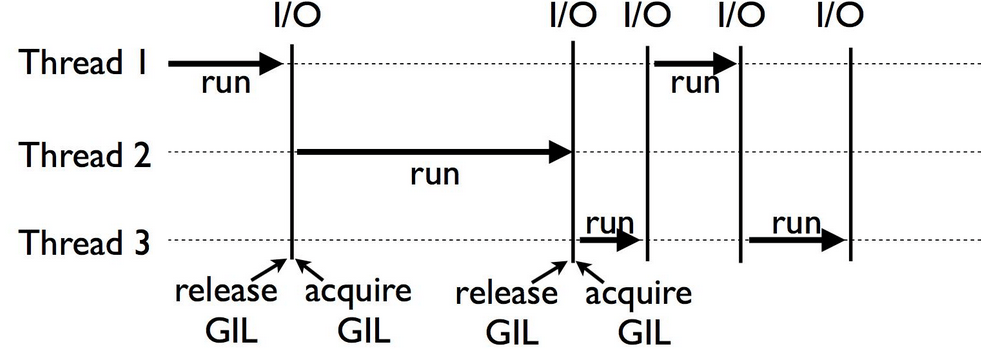


#### Kontroverze ohledně GILu
GIL je v Pythonu dlouhodobě kontroverzní téma. Jeho velkou výhodou a historickým důvodem k zavedení je jednoduchý a snadný *garbage collection* mechanismus (automatické mazání nepotřebných objektů z paměti). Nevýhodou je nemožnost paralelismu na úrovni vláken (vlákna jednoho procesu nemohou používat více jader procesoru najednou).

V betaverzi Pythonu 3.13 se dá nově GIL vypnout!!! :))))))) ale bude to mít určitě svoje nevýhody, tak bacha na to.

------------------------

### Multiprocessing
Multiprocessing je technika, kde je dosaženo paralelismu v jeho nejčistší formě. Více procesů běží na více jádrech CPU, která si mezi sebou nesdílí prostředky. Každý proces může mít mnoho vláken běžících ve svém vlastním paměťovém prostoru. V jazyce Python má každý proces svou vlastní instanci Pythoního interpretu, který vykonává úkoly.


Pro práci s procesy budeme používat modul `multiprocessing`. Pro základní použití má velmi podobné rozhraní, jako `threading`. Důležité akce jsou:

```python
import multiprocessing

process = multiprocessing.Process(target=function, args=[arg1, arg2]) # vytvoření procesu

process.start() # spuštění procesu

process.join() # čekání na ukončení procesu
```


In [8]:
import multiprocessing as mp
from multiprocessing import Process

# pokud chceme zjistit, kolik vypocetnich jader ma nas pocitac k dispozici, spustime
mp.cpu_count()

16

#### Cvičení 7
Změň kód ze cvičení 4 tak, aby místo vláken používal procesy. Celkovou dobu běhu kódu změř. Změnil se změřený čas? Pokud ano, uměl bys vysvětlit, co se to stalo?

In [ ]:
# TODO zapni mereni casu v bunce

# TODO vytvor 2 procesy, ktere spusti cpu_bound

# TODO spust procesy

# TODO pockej na dokonceni procesu

#### Cvičení 8
Změň iterativní tvorbu a spouštění vláken ze cvičení 6 tak, aby místo vláken používal procesy. Zadefinuj si potom 10 procesů s `cpu_bound` funkcí a 100 procesů s `io_bound` funkcí. Celkovou dobu běhu kódu změř. Zkus interpretovat změřený čas.

In [ ]:
# TODO zapni mereni casu v bunce


# TODO: iterativne vytvor 2 procesy, ktere spusti cpu_bound

# TODO: iterativne vytvor 100 procesy, ktere spusti io_bound


# TODO: iterativně spust procesy

# TODO: iterativně pockej na dokonceni procesu

### BONUS: Jednoduchý multiprocessing v praxi: `multiprocessing.Pool`

Python nám pro jednoduché použití multiprocessingu nabízí třídu `multiprocessing.Pool`. Ta nám umožňuje vytvořit pool procesů, které můžeme jednoduše využívat pro paralelní zpracování úloh.

Například implementuje paralelní variantu funkce `map`:

```python
from multiprocessing import Pool

def f(x):
    return x*x

with Pool(5) as p:
    print(p.map(f, [1, 2, 3]))
```
--------------------

#### Bonusové Cvičení 9
Zkus si pomocí `multiprocessing.Pool` urychlit výpočet následujícího kódu:

```python
def long(a):
    cpu_bound(100000000)
    return 2*a

alist = [1,2,3,4,5,6]

# kod ke zrychleni
result = list(map(long, alist))
print(result)
```

Délku běhů porovnej s variantou bez použití `multiprocessing.Pool`. Jaký je rozdíl?

In [9]:
from multiprocessing import Pool

def long(a):
    cpu_bound(100000000)
    return 2*a

alist = [1,2,3,4,5,6]

In [10]:
%%time

# kod ke zrychleni
result = list(map(long, alist))
print(result)

98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
98550 * MainProcess * MainThread 		---> Start counting...
98550 * MainProcess * MainThread 		---> Finished counting...
[2, 4, 6, 8, 10, 12]
CPU times: user 26 s, sys: 32.1 ms, total: 26 s
Wall time: 26.1 s


In [ ]:
# TODO zmer cas vypoctu

# TODO: vytvor pool procesu
# with ..
    # TODO: spust vypocet funkce long na prvcich seznamu paralelne

# Použité zdroje
- multithreading, multiprocessing příklady a vysvětlení: https://www.geeksforgeeks.org/difference-between-multithreading-vs-multiprocessing-in-python/

- obrázek konkurence v case: https://medium.com/geekculture/multithreading-vs-multiprocessing-in-python-71e812127a8c
- obrazek konkurence o zdroje: https://levelup.gitconnected.com/multi-threading-and-multiprocessing-in-python-3d5662f4a528
- GIL: https://www.datacamp.com/tutorial/python-global-interpreter-lock